In [156]:
import pandas as pd
import numpy as np

In [157]:
df=pd.read_csv("spam.csv",encoding='latin-1')

In [158]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2207,ham,Usually the body takes care of it buy making s...,NaN,NaN,NaN
5152,ham,Idk. I'm sitting here in a stop and shop parki...,NaN,NaN,NaN
1188,ham,All will come alive.better correct any good lo...,NaN,NaN,NaN
3868,ham,No let me do the math. Your not good at it.,NaN,NaN,NaN
1353,ham,"Goodnight, sleep well da please take care pa. ...",NaN,NaN,NaN


In [159]:
#data cleaning

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [161]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [162]:
df.sample(10)

,v1,v2
3613,ham,Ok c Ì_ then.
3565,ham,Its ok..come to my home it vl nice to meet and...
4965,spam,URGENT! We are trying to contact U. Todays dra...
5034,ham,How many times i told in the stage all use to ...
4615,ham,ÌÏ called dad oredi...
3727,ham,The search 4 happiness is 1 of d main sources ...
2934,ham,"Yeah, we got one lined up for us"
3040,ham,Aight what time you want me to come up?
1363,ham,"Yetunde, i'm sorry but moji and i seem too bus..."
3468,ham,All day working day:)except saturday and sunday..


In [163]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [164]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()


In [165]:
df['target']=encoder.fit_transform(df['target'])

In [166]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [167]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [168]:
df=df.drop_duplicates(keep='first')

In [169]:
df.duplicated().sum()

0

In [170]:
#eda(exploratory data analysis)

In [171]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x1ae0ea32e10>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

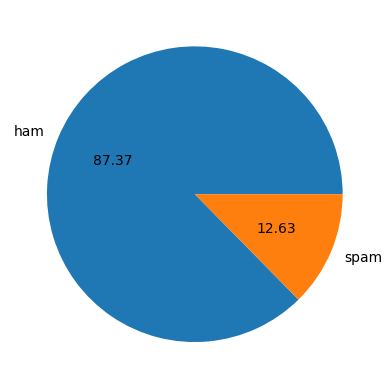

In [172]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [173]:
#data is imbalanced

In [174]:
!pip install nltk --user as nltk
import nltk as nl

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [175]:
nl.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [176]:
df['num_characters']=df['text'].apply(len)

In [177]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [178]:
df['num_words']=df['text'].apply(lambda x:len(nl.word_tokenize(x)))

In [179]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [180]:
df['num_sentences']=df['text'].apply(lambda x:len(nl.sent_tokenize(x)))

In [181]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [182]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [183]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [184]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

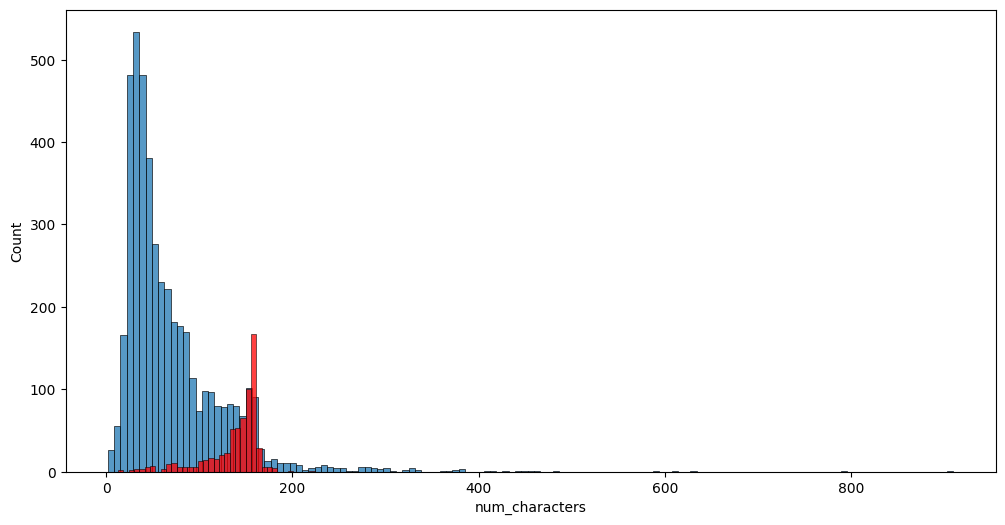

In [185]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

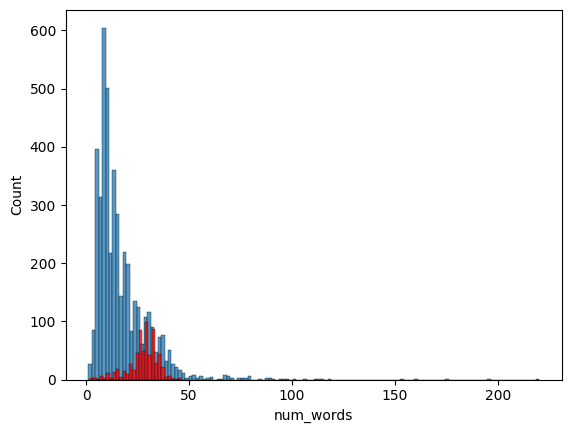

In [186]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')


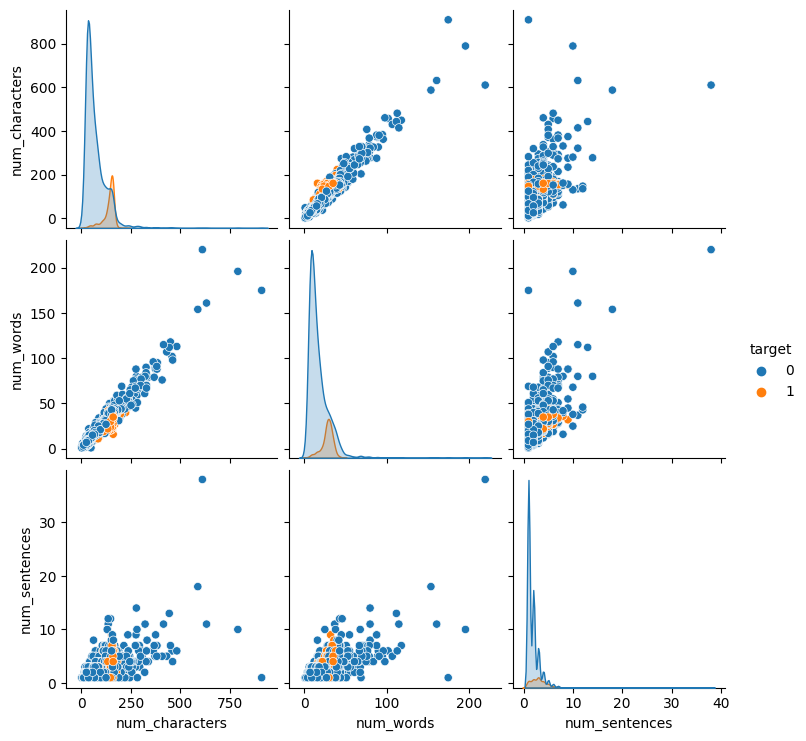

In [187]:
sns.pairplot(df,hue='target')

C:\Users\user\AppData\Local\Temp\ipykernel_14388\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

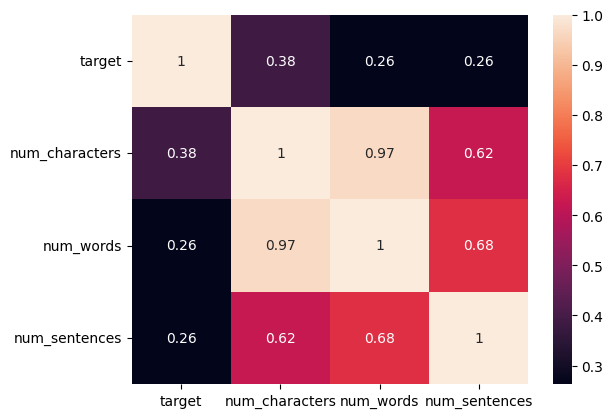

In [188]:
sns.heatmap(df.corr(),annot=True)

In [189]:
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_14388\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


In [190]:
#data preprocessing

In [191]:
def transform_text(text):
    text=text.lower()
    text= nl.word_tokenize(text)
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text= y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
            
    return "  ".join(y)


In [192]:
transform_text('Hi How are you ?sourya')

# % is removed(special character)

#transform_text("did you like my presentation on ml?")
# stopwords and punctuation removed



transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon  na  home  soon  want  talk  stuff  anymor  tonight  k  cri  enough  today'

In [193]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [194]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [195]:
nl.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [196]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [197]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving') 

'love'

In [198]:
df['transformed_text']=df['text'].apply(transform_text)

In [199]:
!pip install wordcloud --user as wcl

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [200]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [201]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

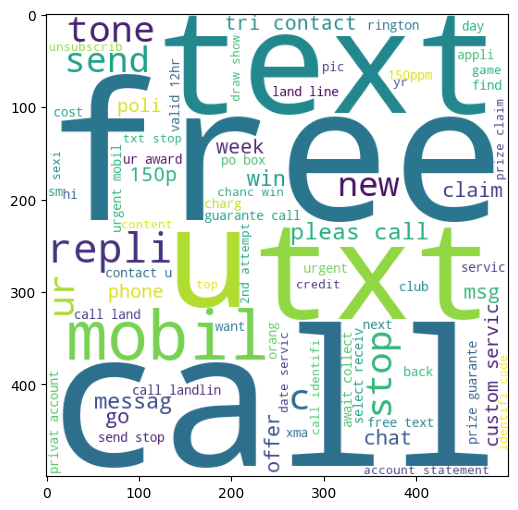

In [202]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [203]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [204]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


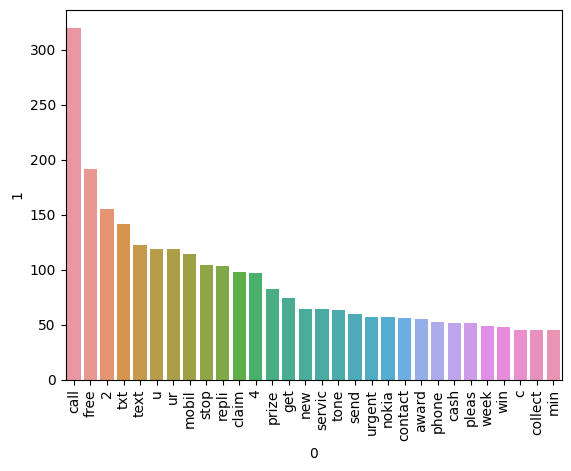

In [205]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [206]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
    

In [207]:
len(ham_corpus)

35404

In [208]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


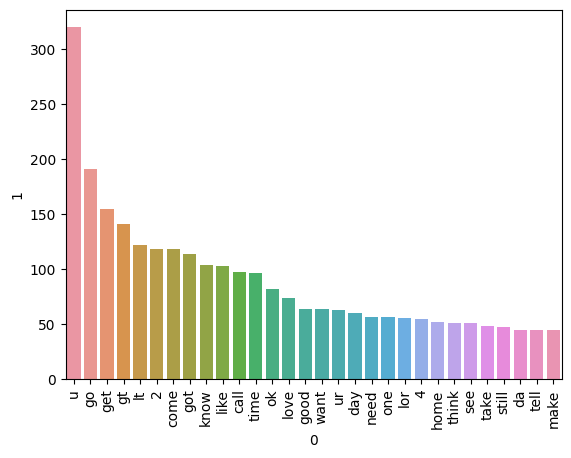

In [209]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [210]:
#model building( naive baies classifier)

In [279]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [280]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [281]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [282]:
#from sklearn.preprocessing import MinMaxScaler
#scaler= MinMaxScaler()
#X=scaler.fit_transform(X)

In [283]:
X.shape

(5169, 3000)

In [284]:
y= df['target'].values

In [285]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [286]:
from sklearn.model_selection import train_test_split

In [287]:
X_train, X_test ,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [288]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [289]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [290]:
gnb.fit(X_train,y_train)
y_predi= gnb.predict(X_test)
print(accuracy_score(y_test,y_predi))
print(confusion_matrix(y_test,y_predi))
print(precision_score(y_test,y_predi))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [291]:
mnb.fit(X_train,y_train)
y_predi2= mnb.predict(X_test)
print(accuracy_score(y_test,y_predi2))
print(confusion_matrix(y_test,y_predi2))
print(precision_score(y_test,y_predi2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [292]:
bnb.fit(X_train,y_train)
y_predi3= bnb.predict(X_test)
print(accuracy_score(y_test,y_predi3))
print(confusion_matrix(y_test,y_predi3))
print(precision_score(y_test,y_predi3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [293]:
#taking multinomialdb because precision score is high

In [294]:
#model improve |
#1. change the max_features to 300 to tfidf-->  accruacy increased for mnb

In [297]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))